#### Import des librairies

In [45]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import imageio
from IPython import display

#### Les fonctions

In [73]:
def make_grid(dim=100, p=0.4):    
    """Une simple fonction qui renvoie une matrice de taille dim x dim, 
    remplie de 1 pour les arbres et de 0 pour les espaces vides, 
    avec un probabilité p d'avoir des arbres"""    
    grid = np.random.choice([1.,0.],dim*dim,p=[p,1-p]).reshape((dim,dim))
    return grid
    
def start_fire(grid, n):
    """Fonction qui initie le feu à n endroits au hasard dans la forêt et renvoie 
    les coordonnées de ces foyers"""    
    c = np.argwhere(grid>0)
    index = np.random.choice(c.shape[0], n, replace=False)
    idx = c[index]    
    for i in idx:  
        grid[tuple(i)] = 0.5
    return idx

def unpad(grid):
    """Fonction qui permet d'enlever le pad d'épaisseur 1 rajouté à la matrice grid dans la fonction 
    propage()"""
    grid = grid[1:-1,1:-1]
    return grid

def propage(grid, f):
    """fonction qui simule la propagation du feu d'un tour à l'autre"""    
    #On pad de 1 pour ne pas s'enconbrer de conditions trop lourdes coucernant les points en dehors de la map
    pgrid = np.pad(grid, 1, 'constant', constant_values=0)
    feu = []
    for coord in f: 
        # Feu tour n-1 devient terre
        pgrid[tuple([coord[0]+1,coord[1]+1])] = 0 
        # Arbres proche du feu prennent feu
        if pgrid[coord[0]+1,coord[1]] == 1: 
            pgrid[coord[0]+1,coord[1]] = 0.5
            feu.append([coord[0],coord[1]-1])
        if pgrid[coord[0]+1,coord[1]+2] == 1: 
            pgrid[coord[0]+1,coord[1]+2] = 0.5
            feu.append([coord[0],coord[1]+1])
        if pgrid[coord[0],coord[1]+1] == 1: 
            pgrid[coord[0],coord[1]+1] = 0.5
            feu.append([coord[0]-1,coord[1]])
        if pgrid[coord[0]+2,coord[1]+1] == 1: 
            pgrid[coord[0]+2,coord[1]+1] = 0.5
            feu.append([coord[0]+1,coord[1]])                 
    pgrid = unpad(pgrid)                    
    return pgrid, feu

def remove_files(path='images/'):
    files = glob.glob(path+'*')
    for f in files:
        os.remove(f)

def moy_simulation(nb_iter, p):
    """Une fonction permettant de calculer le taux moyen d'arbres restants en fonction du taux initial p et 
    la moyenne est calculée à partir des nb_iter"""
    total_moy = 0
    nb_iter = 500
    for i in range(nb_iter):
        total_moy += simulation(rand,fire_takes_corner)
    return total_moy/nb_iter

#### L'animation

In [78]:
t_foret = 100
grid = make_grid(t_foret, 0.6)
feu = start_fire(grid, 2)
cmap = colors.ListedColormap(['gray','red', 'green']) 

remove_files()

i = 0
while len(feu) > 0:    
    fig = plt.figure(figsize=(12,12))
    plt.matshow(grid, cmap=cmap, fignum=1)
    plt.axis('off')
    plt.title('Forêt prenant feu')
    plt.savefig('images/percolation{:04d}.png'.format(i))
    plt.close('all')
    grid, feu = propage(grid, feu)
    i += 1

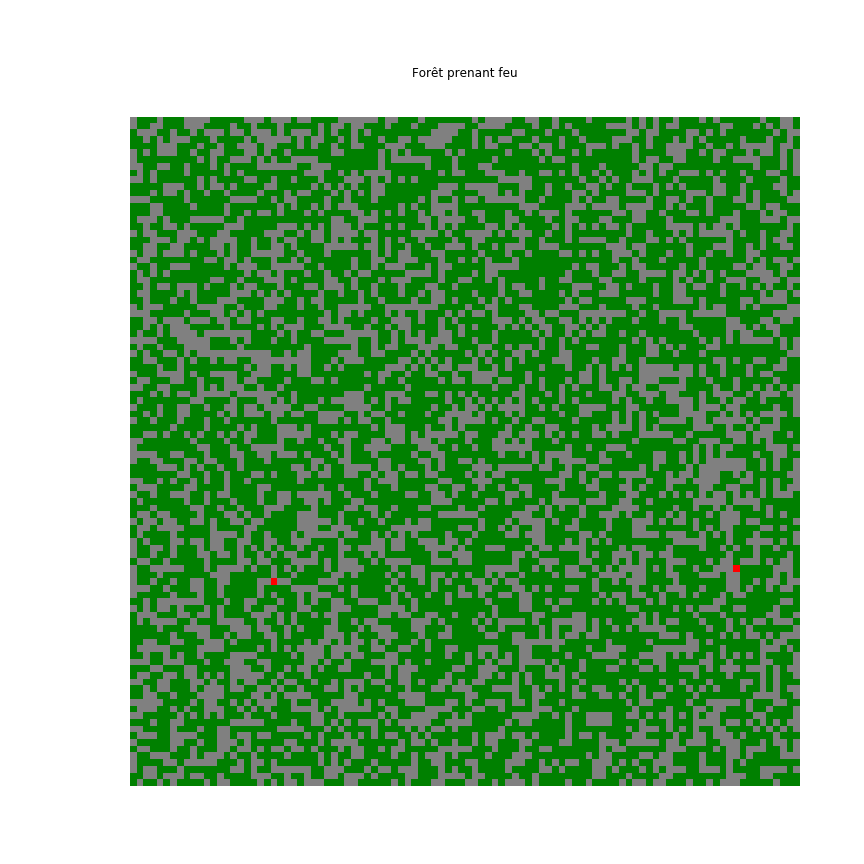

In [79]:
#generate gif of saved images
anim_file = 'percolation.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('images/percolation*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

display.Image(filename=anim_file)

#### Analyse du seuil de percolation